Exploring menstrual cycle 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from matplotlib import pyplot as plt
import scvelo as scv
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy
from scipy import io

In [12]:
oviductepithelial = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/oviductepitheliumforconcat.h5ad')

In [3]:
oviductepithelial = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/renamedoviductepitheliumwithoutpatient14_forconcat.h5ad')

In [3]:
oviductepithelial

AnnData object with n_obs × n_vars = 14630 × 3100
    obs: 'Author', 'BioSample', 'Patient', 'Run', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types', 'menstrual_status', 'Age', 'cycle_day', 'Tissuelocation', 'n_counts', 'velocity_self_transition', 'epithelial_celltypes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std', 'velocity_offset2', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Author_colors', 'Cell_Types_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix'

In [4]:
menstrualtissuedict = {
 'Secretory_FT': ['Secretory'],
'Proliferative_FT':['Proliferative'],
 'Post-menopausal_FT': ['Post-menopausal'], 
 'Peri-menopausal_FT': ['Peri-menopausal']}

oviductepithelial.obs['menstrual_status_tissue'] = np.nan

for i in menstrualtissuedict.keys():
    ind = pd.Series(oviductepithelial.obs.menstrual_status).isin(menstrualtissuedict[i])
    oviductepithelial.obs.loc[ind,'menstrual_status_tissue'] = i

In [12]:
oviductepithelial.obs['menstrual_status_tissue']

CellID
SRR14804445:AAACCCAGTACCCACGx                     Secretory_FT
SRR14804445:AACAAAGAGGTCCTGCx                     Secretory_FT
SRR14804445:AAAGGTACAGCCTTCTx                     Secretory_FT
SRR14804445:AAAGTGAAGGCACAACx                     Secretory_FT
SRR14804445:AAACCCACAATTCTCTx                     Secretory_FT
                                                   ...        
SRR10308430_KMODB:SRR10308430.sorted.bam          Secretory_FT
SRR10308725_MAY3G:SRR10308725.sorted.bam    Post-menopausal_FT
SRR10308756_S29MY:SRR10308756.sorted.bam    Post-menopausal_FT
SRR10309139_FKI51:SRR10309139.sorted.bam          Secretory_FT
SRR10308566_BT0CU:SRR10308566.sorted.bam          Secretory_FT
Name: menstrual_status_tissue, Length: 14630, dtype: object

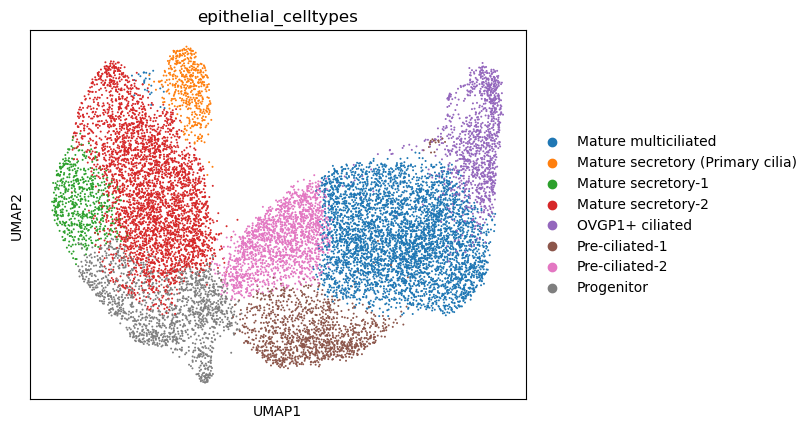

In [13]:
sc.pl.umap(oviductepithelial, color=['epithelial_celltypes'],save ='FTepithelialcelltypes.png')

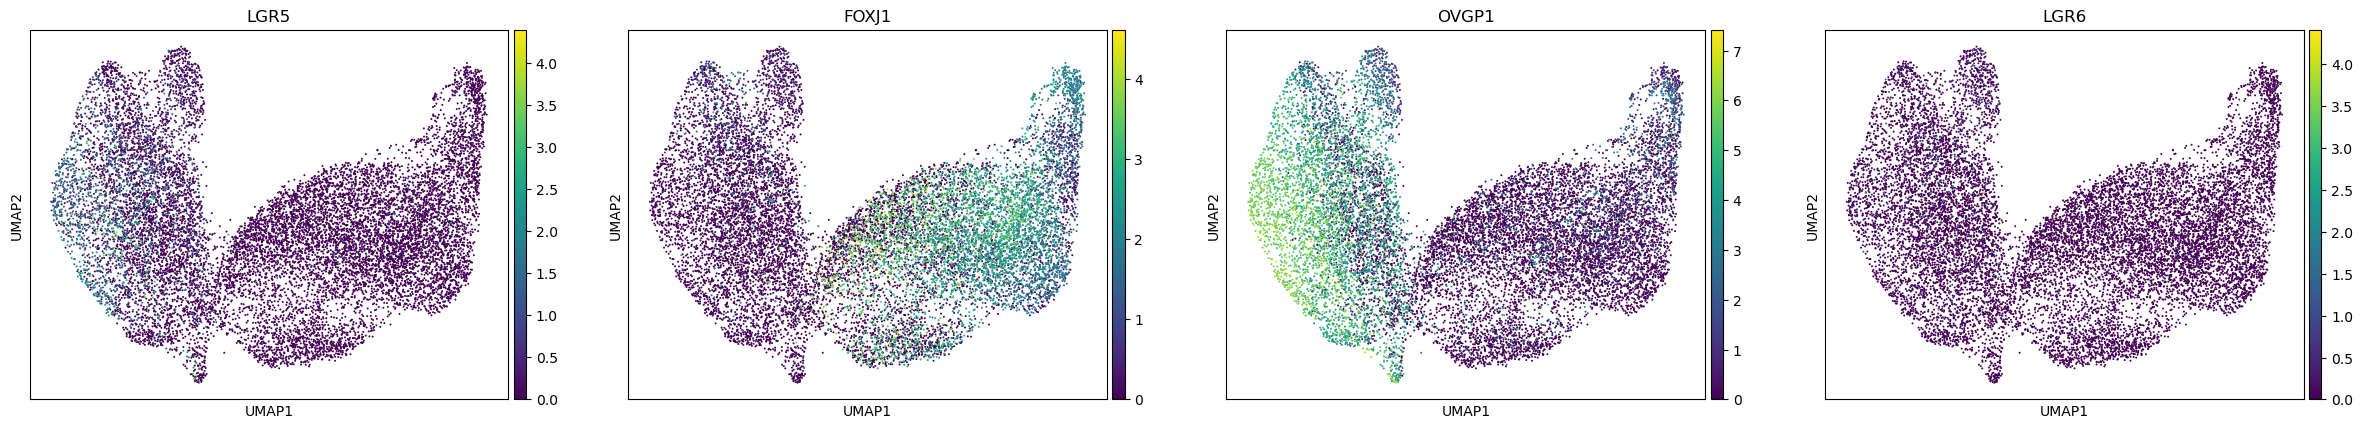

In [24]:
sc.pl.umap(oviductepithelial, color=['LGR5','FOXJ1','OVGP1','LGR6'],save ='FTepithelialmarkergenes.png')

saving figure to file ./figures/scvelo_FTRNAvelocity.png


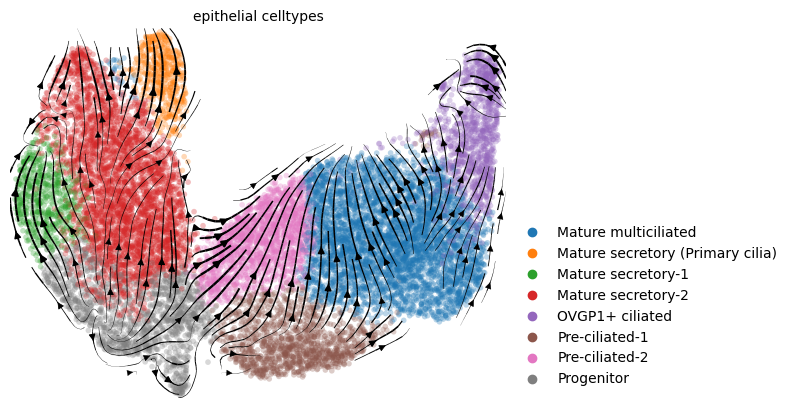

In [5]:
scv.pl.velocity_embedding_stream(oviductepithelial, basis='umap', color='epithelial_celltypes',
                                 legend_fontsize='10', legend_loc='lower right', save='FTRNAvelocity.png')


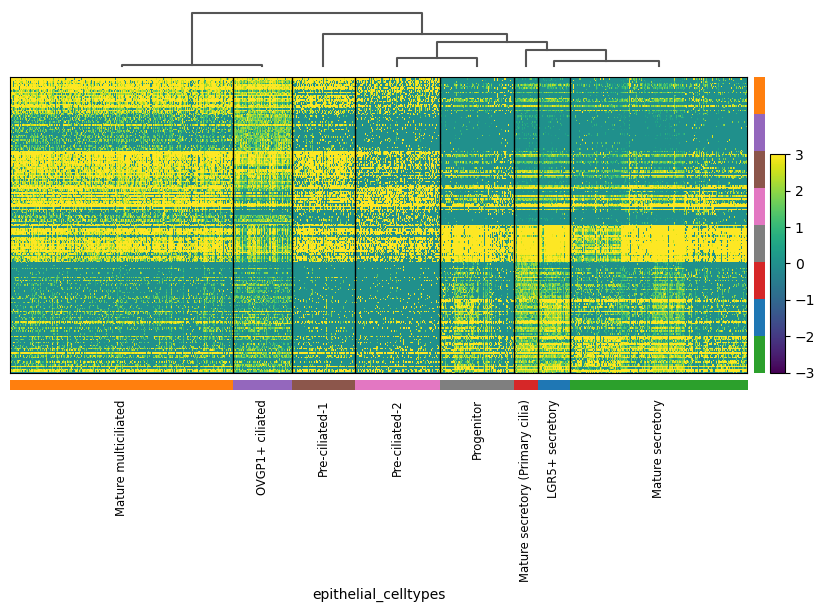

In [14]:
sc.pp.log1p(oviductepithelial)
sc.tl.rank_genes_groups(oviductepithelial,'epithelial_celltypes', method='wilcoxon')
sc.tl.dendrogram(oviductepithelial, groupby='epithelial_celltypes')
sc.pl.rank_genes_groups_heatmap(oviductepithelial, n_genes=25, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3 ,save ='FTepithleialcelltypesheatmap.png')


In [8]:
menstrual=oviductepithelial[oviductepithelial.obs['menstrual_status'].isin(['Proliferative','Secretory']),:].copy()

In [36]:
grouped = menstrual.obs.groupby('menstrual_status')
counts = grouped['epithelial_celltypes'].value_counts().unstack().fillna(0)
proportions = counts.divide(counts.sum(axis=1), axis=0)

counts

epithelial_celltypes  LGR5+ secretory  Mature multiciliated  Mature secretory  \
menstrual_status                                                                
Proliferative                      12                  1287               627   
Secretory                         559                  3038              2418   

epithelial_celltypes  Mature secretory (Primary cilia)  OVGP1+ ciliated  \
menstrual_status                                                          
Proliferative                                        2               46   
Secretory                                          459              886   

epithelial_celltypes  Pre-ciliated-1  Pre-ciliated-2  Progenitor  
menstrual_status                                                  
Proliferative                    436             499         127  
Secretory                        714            1172        1171

<Figure size 600x600 with 0 Axes>

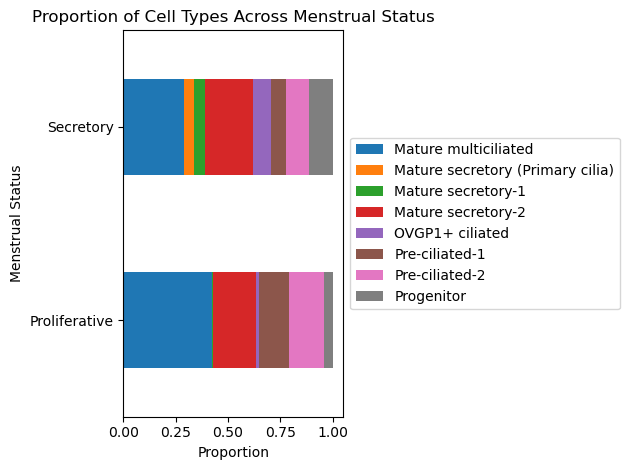

In [9]:
grouped = menstrual.obs.groupby('menstrual_status')
counts = grouped['epithelial_celltypes'].value_counts().unstack().fillna(0)
proportions = counts.divide(counts.sum(axis=1), axis=0)


custom_palette = sns.color_palette('Set3',12)
sns.set_palette('tab10',12)

plt.figure(figsize=(6,6))
proportions.plot(kind='barh', stacked=True, )
plt.xlabel('Proportion')
plt.ylabel('Menstrual Status')
plt.title('Proportion of Cell Types Across Menstrual Status')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.tight_layout()
sns.reset_defaults()
plt.show()

save = ('fallopiantubeproportionssecretoryproliferativemenstrualstatus.png')

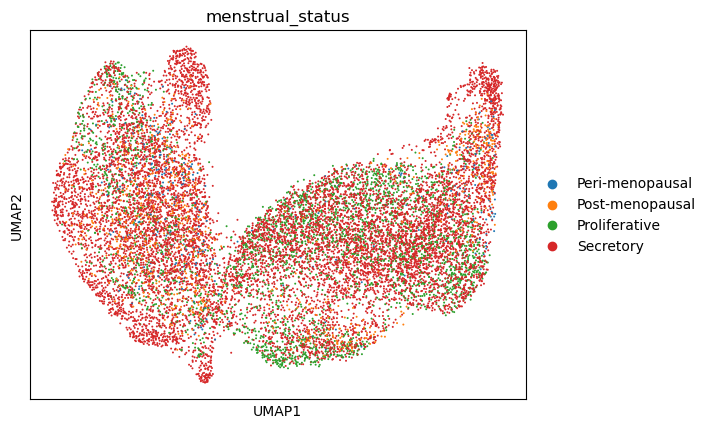

In [9]:
sc.pl.umap(oviductepithelial, color=['epithelial_celltypes'])

In [10]:
secretory=oviductepithelial[oviductepithelial.obs['menstrual_status'].isin(['Secretory']),:].copy()

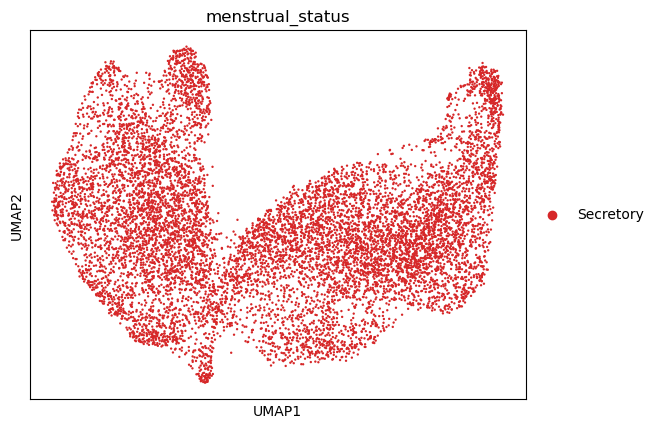

In [11]:
sc.pl.umap(secretory, color=['menstrual_status'])

In [12]:
proliferative=oviductepithelial[oviductepithelial.obs['menstrual_status'].isin(['Proliferative']),:].copy()

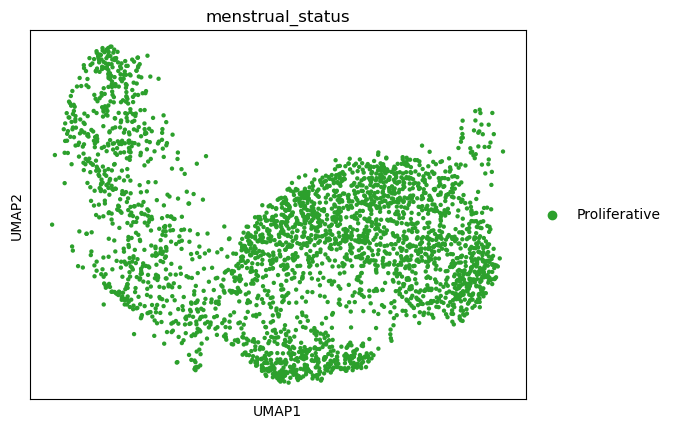

In [13]:
sc.pl.umap(proliferative, color=['menstrual_status'])

### add in endometrial data 

In [16]:
endo= sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/endometrialepithelialclusteringfinalforconcat.h5ad')

In [15]:
endo.obs

10x kit Batch menstrual_status  \
CellID                                                              
SRR11869240:AAAGGGCCATGGAGACx      3' v3.1    13    Proliferative   
SRR11869240:AAAGGTATCTCGGTCTx      3' v3.1    13    Proliferative   
SRR11869240:AAAGGTACAAAGTGTAx      3' v3.1    13    Proliferative   
SRR11869240:AAAGGATCAAGTTTGCx      3' v3.1    13    Proliferative   
SRR11869240:AAACCCATCAACACCAx      3' v3.1    13    Proliferative   
...                                    ...   ...              ...   
MRC_Endo8625698:TTAGTCTAGGTCTGGAx    3' v3    10        Secretory   
MRC_Endo8625698:TTCCTCTCAACTCGATx    3' v3    10        Secretory   
MRC_Endo8625698:TTCCTTCGTTCCACGGx    3' v3    10        Secretory   
MRC_Endo8625698:TTCTGTAGTCAGGTAGx    3' v3    10        Secretory   
MRC_Endo8625698:TTTACGTGTGACTAAAx    3' v3    10        Secretory   

                                           BiopsyType    Day       DonorID  \
CellID                                                                       
SRR11869240:AAAGGGCCATGGAGACx      Superficial_Biopsy  day16  SAMN15049042   
SRR11869240:AAAGGTATCTCGGTCTx      Superficial_Biopsy  day16  SAMN15049042   
SRR11869240:AAAGGTACAAAGTGTAx      Superficial_Biopsy  day16  SAMN15049042   
SRR11869240:AAAGGATCAAGTTTGCx      Superficial_Biopsy  day16  SAMN15049042   
SRR11869240:AAACCCATCAACACCAx      Superficial_Biopsy  day16  SAMN15049042   
...                                               ...    ...           ...   
MRC_Endo8625698:TTAGTCTAGGTCTGGAx  Superficial_Biopsy  day25            E1   
MRC_Endo8625698:TTCCTCTCAACTCGATx  Superficial_Biopsy  day25            E1   
MRC_Endo8625698:TTCCTTCGTTCCACGGx  Superficial_Biopsy  day25            E1   
MRC_Endo8625698:TTCTGTAGTCAGGTAGx  Superficial_Biopsy  day25            E1   
MRC_Endo8625698:TTTACGTGTGACTAAAx  Superficial_Biopsy  day25            E1   

                                             Location         SampleID  \
CellID                                                                   
SRR11869240:AAAGGGCCATGGAGACx      endometrium_biopsy      SRR11869240   
SRR11869240:AAAGGTATCTCGGTCTx      endometrium_biopsy      SRR11869240   
SRR11869240:AAAGGTACAAAGTGTAx      endometrium_biopsy      SRR11869240   
SRR11869240:AAAGGATCAAGTTTGCx      endometrium_biopsy      SRR11869240   
SRR11869240:AAACCCATCAACACCAx      endometrium_biopsy      SRR11869240   
...                                               ...              ...   
MRC_Endo8625698:TTAGTCTAGGTCTGGAx  endometrium_biopsy  MRC_Endo8625698   
MRC_Endo8625698:TTCCTCTCAACTCGATx  endometrium_biopsy  MRC_Endo8625698   
MRC_Endo8625698:TTCCTTCGTTCCACGGx  endometrium_biopsy  MRC_Endo8625698   
MRC_Endo8625698:TTCTGTAGTCAGGTAGx  endometrium_biopsy  MRC_Endo8625698   
MRC_Endo8625698:TTTACGTGTGACTAAAx  endometrium_biopsy  MRC_Endo8625698   

                                            Stage Author  ...  \
CellID                                                    ...   
SRR11869240:AAAGGGCCATGGAGACx       proliferative   Wang  ...   
SRR11869240:AAAGGTATCTCGGTCTx       proliferative   Wang  ...   
SRR11869240:AAAGGTACAAAGTGTAx       proliferative   Wang  ...   
SRR11869240:AAAGGATCAAGTTTGCx       proliferative   Wang  ...   
SRR11869240:AAACCCATCAACACCAx       proliferative   Wang  ...   
...                                           ...    ...  ...   
MRC_Endo8625698:TTAGTCTAGGTCTGGAx  late-secretory     GA  ...   
MRC_Endo8625698:TTCCTCTCAACTCGATx  late-secretory     GA  ...   
MRC_Endo8625698:TTCCTTCGTTCCACGGx  late-secretory     GA  ...   
MRC_Endo8625698:TTCTGTAGTCAGGTAGx  late-secretory     GA  ...   
MRC_Endo8625698:TTTACGTGTGACTAAAx  late-secretory     GA  ...   

                                  n_genes_by_counts total_counts  \
CellID                                                             
SRR11869240:AAAGGGCCATGGAGACx                  1862       3421.0   
SRR11869240:AAAGGTATCTCGGTCTx                  1401       2299.0   
SRR11869240:AAAGGTACAAAGTGTAx            

In [33]:
menstrualtissuedictendo = {
 'Secretory_endo': ['Secretory'],
'Proliferative_endo':['Proliferative']}

In [34]:
endo.obs['menstrual_status_tissue'] = np.nan

for i in menstrualtissuedictendo.keys():
    ind = pd.Series(endo.obs.menstrual_status).isin(menstrualtissuedictendo[i])
    endo.obs.loc[ind,'menstrual_status_tissue'] = i

In [9]:
endo.obs['menstrual_status_tissue']

CellID
SRR11869240:AAAGGGCCATGGAGACx        Proliferative_endo
SRR11869240:AAAGGTATCTCGGTCTx        Proliferative_endo
SRR11869240:AAAGGTACAAAGTGTAx        Proliferative_endo
SRR11869240:AAAGGATCAAGTTTGCx        Proliferative_endo
SRR11869240:AAACCCATCAACACCAx        Proliferative_endo
                                            ...        
MRC_Endo8625698:TTAGTCTAGGTCTGGAx        Secretory_endo
MRC_Endo8625698:TTCCTCTCAACTCGATx        Secretory_endo
MRC_Endo8625698:TTCCTTCGTTCCACGGx        Secretory_endo
MRC_Endo8625698:TTCTGTAGTCAGGTAGx        Secretory_endo
MRC_Endo8625698:TTTACGTGTGACTAAAx        Secretory_endo
Name: menstrual_status_tissue, Length: 58463, dtype: object

In [19]:
oviductepithelial = oviductepithelial[~oviductepithelial.obs['Patient'].isnull()]

In [37]:
grouped = endo.obs.groupby('menstrual_status')
counts = grouped['epithelial_celltypes'].value_counts().unstack().fillna(0)
proportions = counts.divide(counts.sum(axis=1), axis=0)

counts

epithelial_celltypes  Ciliated (endometrial)  Ciliated LGR5+  Glandular  \
menstrual_status                                                          
Proliferative                            546              18          1   
Secretory                                770            1971       8084   

epithelial_celltypes  Glandular Secretory  Lumenal 1  Lumenal 2  Lumenal 3  \
menstrual_status                                                             
Proliferative                         532          1          1          0   
Secretory                           16260      14582       1397       3070   

epithelial_celltypes  Pre-Ciliated  Proliferative SOX9+  SOX9+ LGR5+  \
menstrual_status                                                       
Proliferative                  738                 1697          879   
Secretory                     1008                   40           21   

epithelial_celltypes  SOX9+ LGR5-  
menstrual_status                   
Proliferative                6516  
Secretory                     331

<Figure size 600x1000 with 0 Axes>

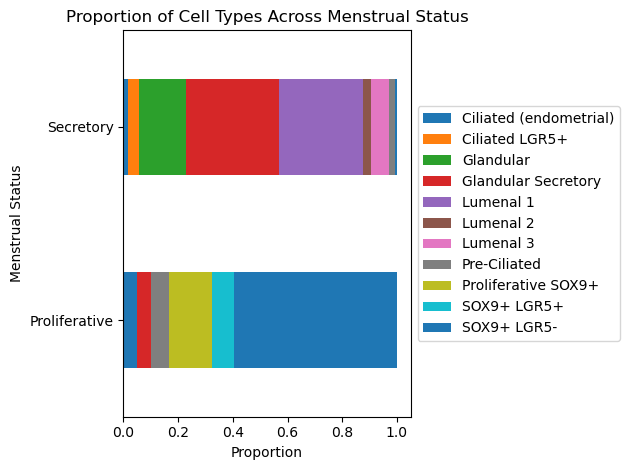

In [10]:
grouped = endo.obs.groupby('menstrual_status')
counts = grouped['epithelial_celltypes'].value_counts().unstack().fillna(0)
proportions = counts.divide(counts.sum(axis=1), axis=0)

custom_palette = sns.color_palette('Set3',12)
sns.set_palette('tab10',12)

plt.figure(figsize=(6,10))
proportions.plot(kind='barh', stacked=True)
plt.xlabel('Proportion')
plt.ylabel('Menstrual Status')
plt.title('Proportion of Cell Types Across Menstrual Status')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.tight_layout()
sns.reset_defaults()
plt.show()

save = ('endometrialproportionsacrossmenstrualstatus.png')

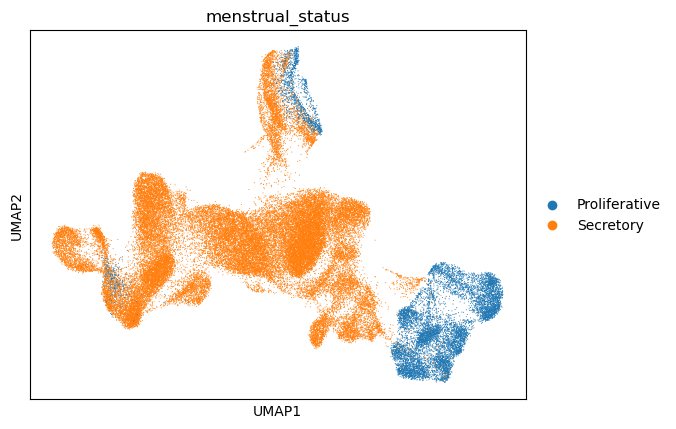

In [21]:
sc.pl.umap(endo, color='menstrual_status')

In [14]:
endosecretory=endo[endo.obs['menstrual_status'].isin(['Secretory']),:].copy()

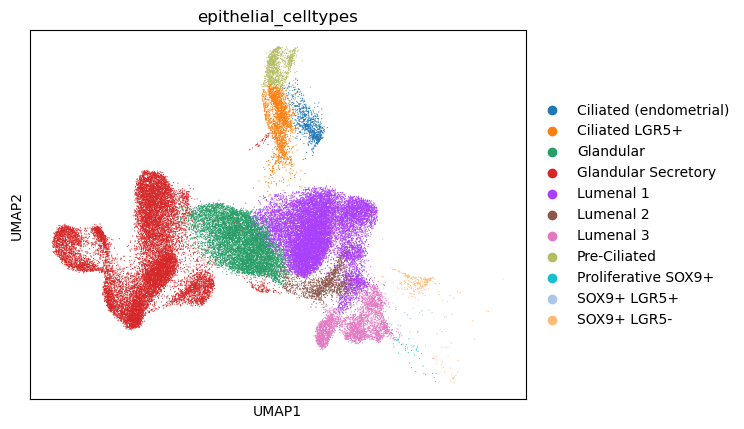

In [17]:
sc.pl.umap(endosecretory, color=['epithelial_celltypes'],
           save='endometrialcelltypessecretoryohase.png')

In [3]:
oviendo = sc.read_h5ad('/home/j87832lw/mounting/oviduct/oviduct.all/oviendoepithelialcellscombined.h5ad')


#### annotating data

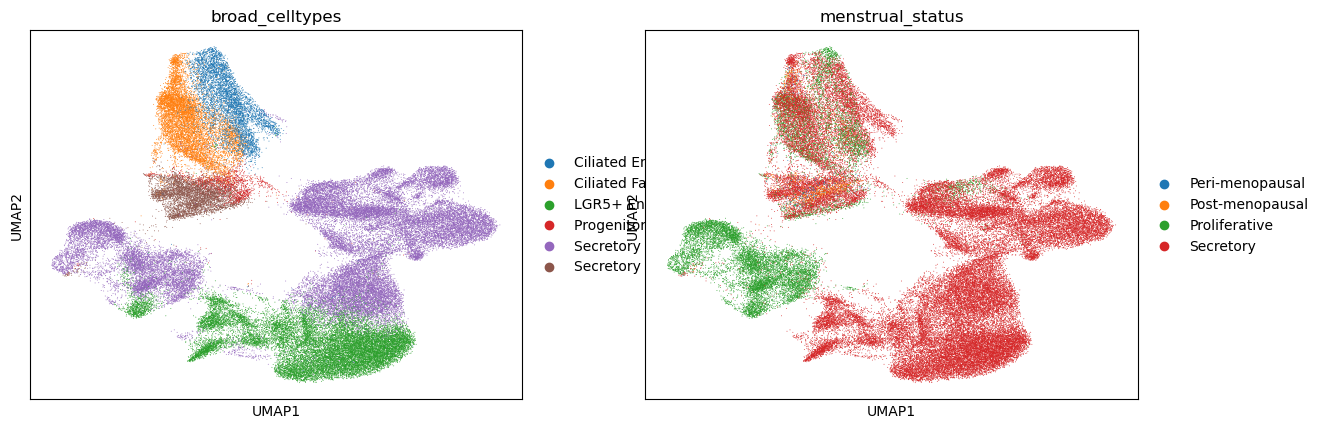

In [39]:
sc.pl.umap(oviendo, color=['broad_celltypes','menstrual_status'])

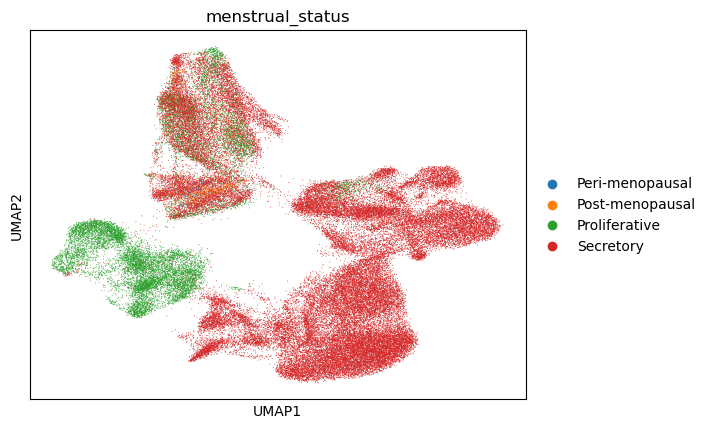

In [24]:
sc.pl.umap(oviendo, color=['menstrual_status'])

##secretory endometrium, full FT comparison

In [6]:
secretoryoviendo= oviendo[oviendo.obs['menstrual_status_tissue'].isin(['Secretory_FT','Secretory_endo']),:].copy()

KeyError: 'menstrual_status_tissue'

In [28]:
results_file = '/home/j87832lw/oviduct/oviduct.all/secretoryendoonlyoviendoumap.h5ad'
secretoryoviendo.write(results_file)

KeyboardInterrupt: 

In [8]:
secretoryoviendo = sc.read_h5ad('/home/j87832lw/oviduct/oviduct.all/secretoryendoonlyoviendoumap.h5ad')

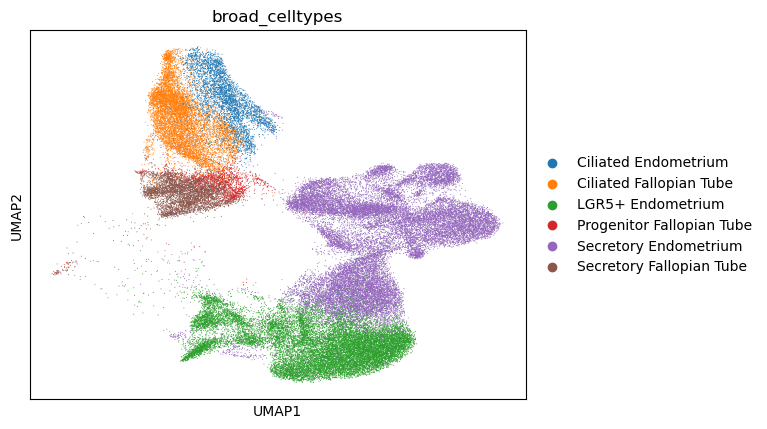

In [3]:
sc.pl.umap(secretoryoviendo, color=['broad_celltypes'], save =('celltypessecretoryphase.png'))

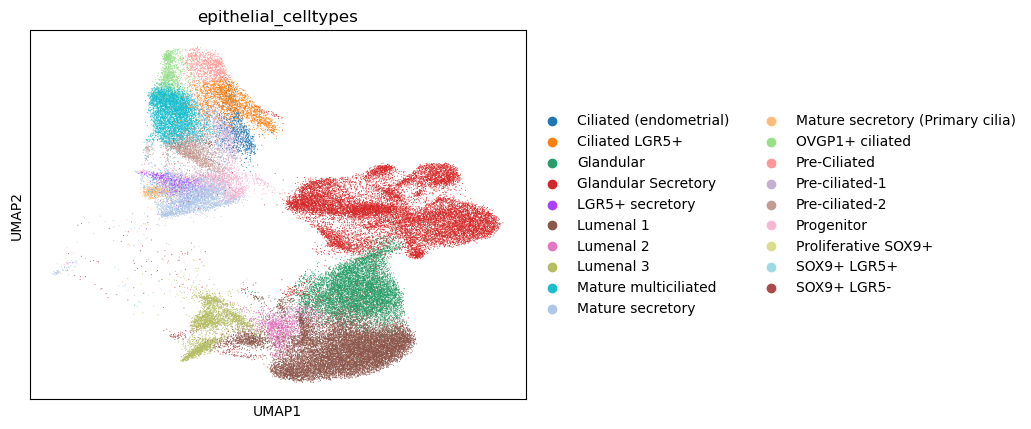

In [9]:
sc.pl.umap(secretoryoviendo, color=['epithelial_celltypes'])

In [41]:
secretoryoviendo.obs['

AnnData object with n_obs × n_vars = 57951 × 1386
    obs: 'Author', 'Patient', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types', 'menstrual_status', 'Age', 'cycle_day', 'n_counts', 'velocity_self_transition', 'epithelial_celltypes', 'menstrual_status_tissue', 'broad_celltypes', 'epithelialcelltypes_tissue', 'Tissue_type'
    uns: 'Author_colors', 'Cell_Types_colors', 'broad_celltypes_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'menstrual_status_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [44]:
secretoryoviendo.obs['Patient']

CellID
SRR14804445:AAACCCAGTACCCACGx         patient 9
SRR14804445:AACAAAGAGGTCCTGCx         patient 9
SRR14804445:AAAGGTACAGCCTTCTx         patient 9
SRR14804445:AAAGTGAAGGCACAACx         patient 9
SRR14804445:AAACCCACAATTCTCTx         patient 9
                                        ...    
MRC_Endo8625698:TTAGTCTAGGTCTGGAx    patient 18
MRC_Endo8625698:TTCCTCTCAACTCGATx    patient 18
MRC_Endo8625698:TTCCTTCGTTCCACGGx    patient 18
MRC_Endo8625698:TTCTGTAGTCAGGTAGx    patient 18
MRC_Endo8625698:TTTACGTGTGACTAAAx    patient 18
Name: Patient, Length: 57951, dtype: category
Categories (16, object): ['patient 3', 'patient 5', 'patient 7', 'patient 9', ..., 'patient 26', 'patient 27', 'patient 28', 'patient 30']

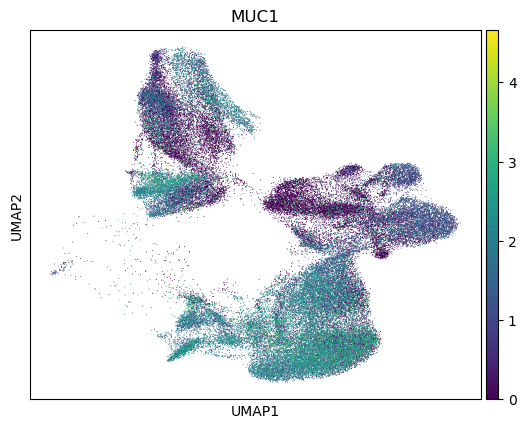

In [4]:
## Ectopic associated genes
sc.pl.umap(secretoryoviendo, color=['MUC1'],save =('MUC1umapsecretoryphase.png'))

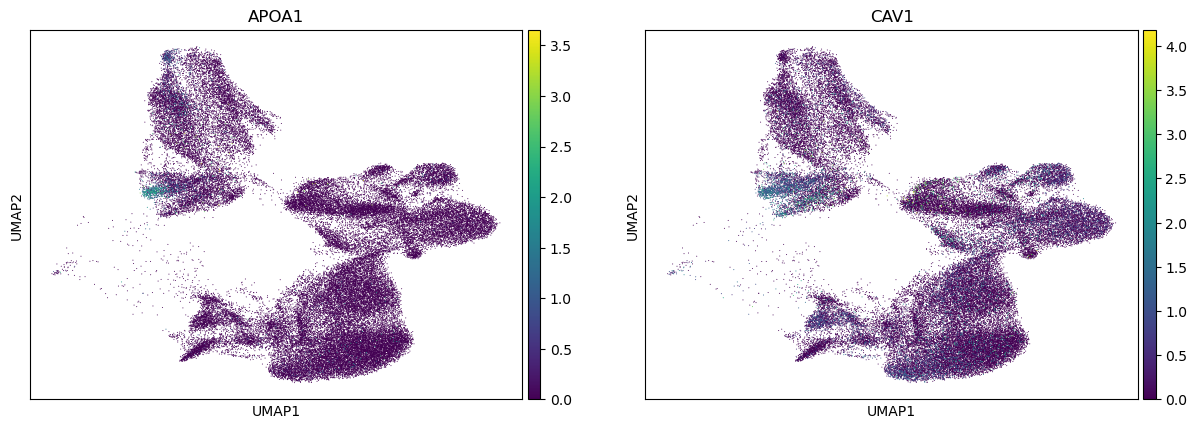

In [27]:
sc.pl.umap(secretoryoviendo, color=['APOA1','CAV1'],save =('APOA1umapsecretoryphase.png'))

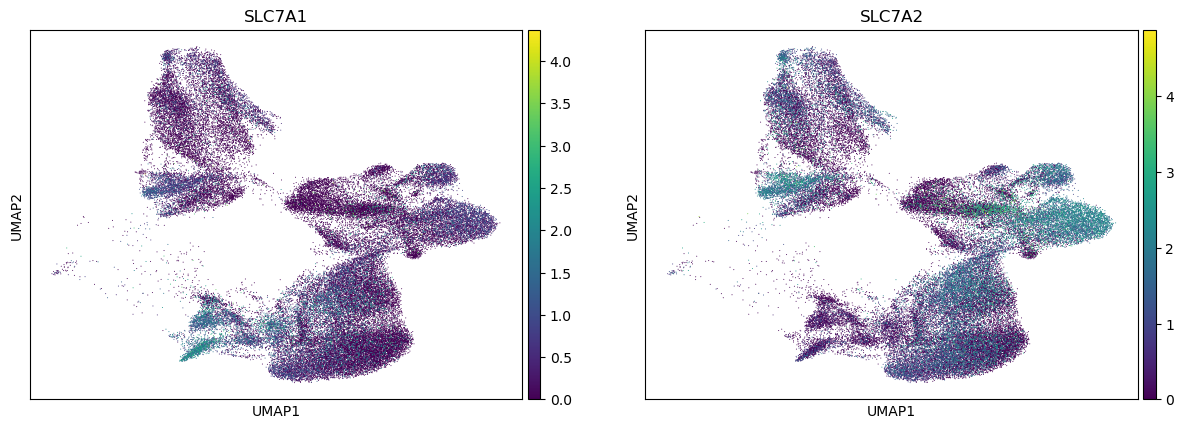

In [26]:
sc.pl.umap(secretoryoviendo, color=['SLC7A1','SLC7A2'],save =('markergenesforpresentation.png'))

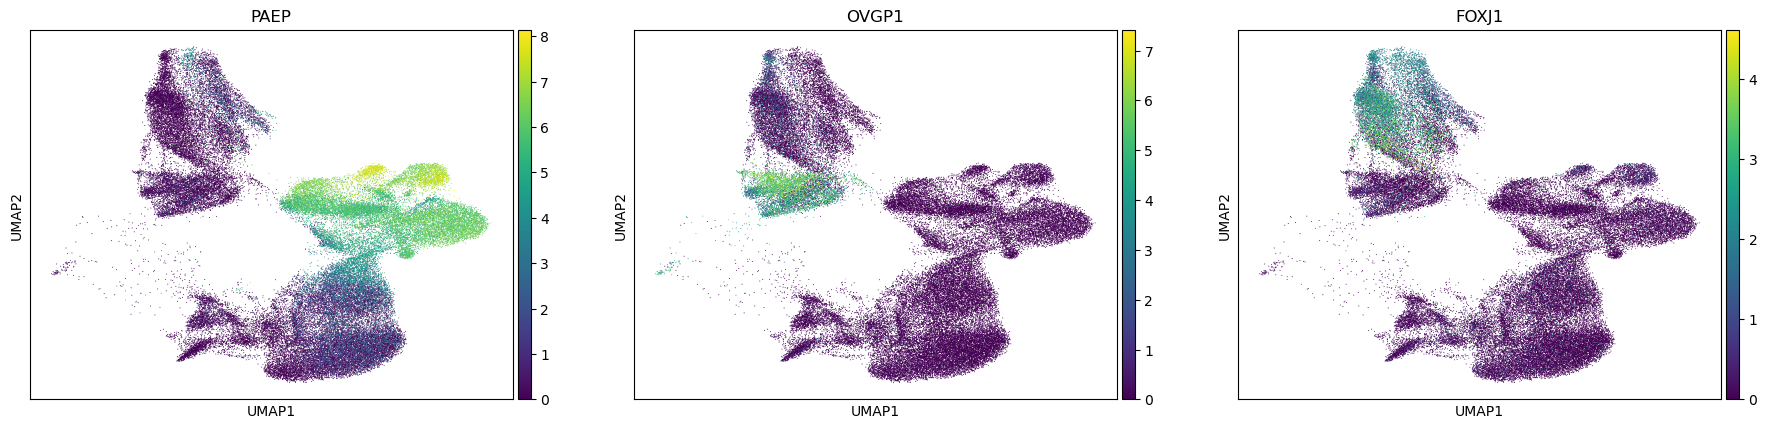

In [37]:
sc.pl.umap(secretoryoviendo, color=[''],save =('markergenesforpresentation.png'))

In [5]:
marker_genes= ['OVGP1','PAEP','FOXJ1','APOA1','CAV1','MUC1']

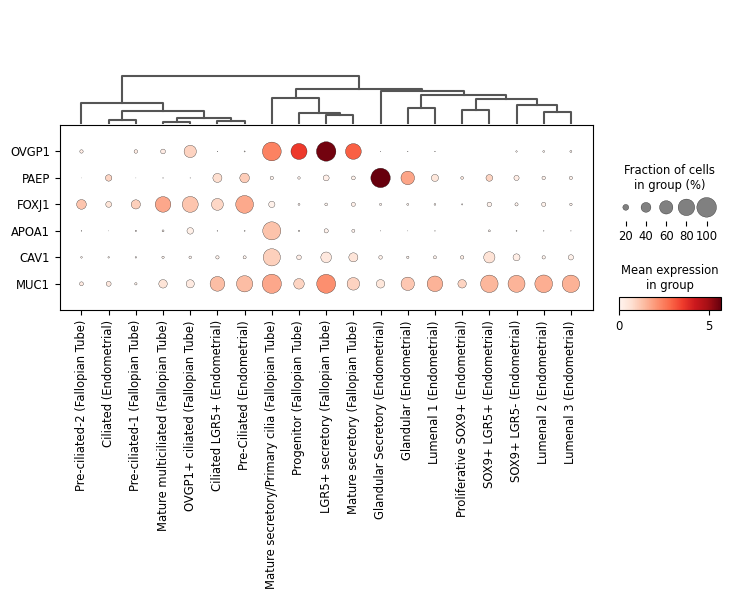

In [6]:
sc.pl.dotplot(secretoryoviendo, marker_genes, groupby='epithelialcelltypes_tissue',
              var_group_rotation=70, dendrogram=True, swap_axes=True )

In [ ]:
sc.pp.log1p(secretoryoviendo)
sc.tl.rank_genes_groups(secretoryoviendo,'broad_celltypes', method='wilcoxon')
sc.tl.dendrogram(secretoryoviendo, groupby='broad_celltypes')
sc.pl.rank_genes_groups_heatmap(secretoryoviendo, n_genes=25, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3 ,save ='secretoryphaseoviendoDEGS.png')

In [9]:
topmarkers = secretoryoviendo.uns['rank_genes_groups'].head(25)

AttributeError: 'dict' object has no attribute 'head'

In [8]:
topmarkers = secretoryoviendo.uns['rank_genes_groups']
groups = topmarkers['names'].dtype.names
secretoryoviendoDEGS = pd.DataFrame({group +'_'+key[:1]:topmarkers[key][group]
              for group in groups for key in ['names','pvals']})
secretoryoviendoDEGSscores = pd.DataFrame({group +'_'+key[:1]:topmarkers[key][group]
              for group in groups for key in ['names','scores']})

secretoryoviendoDEGS.to_excel(r'/home/j87832lw/oviduct/marker_gene_files/secretoryoviendoDEGsv2.xlsx', index=False)
secretoryoviendoDEGSscores.to_excel(r'/home/j87832lw/oviduct/marker_gene_files/secretoryoviendoscoresDEGsv2.xlsx', index=False)
